<a href="https://colab.research.google.com/github/HarshithReddy01/Algorithms-Practice/blob/master/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import plotly.express as px

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
np.random.seed(0)

In [ ]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

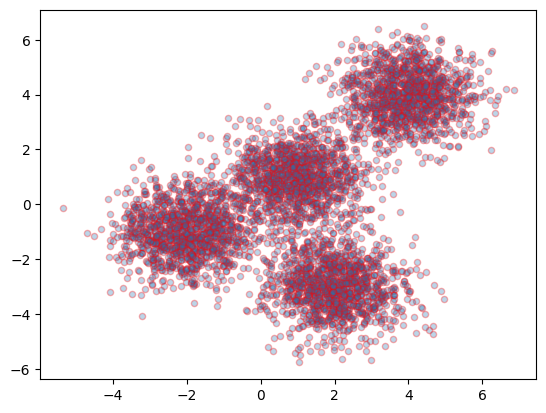

In [ ]:
plt.scatter(X[:, 0], X[:, 1], marker='.',alpha=0.3,ec='r',s=80)


In [ ]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [ ]:
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_labels
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 0.96900523,  0.98370298],
       [ 3.97334234,  3.98758687],
       [-2.03743147, -0.99782524],
       [ 1.99741008, -3.01666822]])

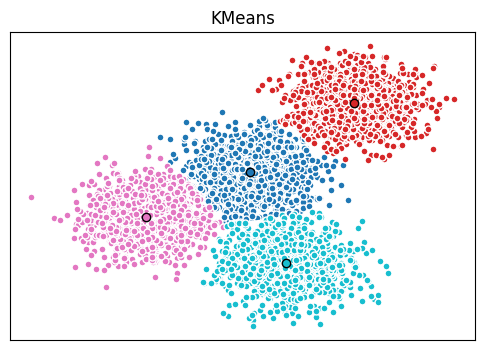

In [ ]:
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means_labels))))
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())

plt.show()


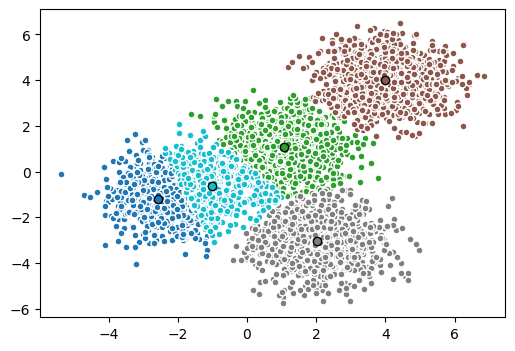

In [ ]:
k_means3 = KMeans(init="k-means++", n_clusters=5, n_init=12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

In [ ]:
cust_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv")
cust_df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


In [ ]:
cust_df = cust_df.drop('Address', axis=1)


In [ ]:
cust_df = cust_df.dropna()
cust_df.info()

In [ ]:
cust_df = cust_df.dropna()
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      700 non-null    int64  
 1   Age              700 non-null    int64  
 2   Edu              700 non-null    int64  
 3   Years Employed   700 non-null    int64  
 4   Income           700 non-null    int64  
 5   Card Debt        700 non-null    float64
 6   Other Debt       700 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


In [ ]:
X = cust_df.values[:,1:]
Clus_dataSet = StandardScaler().fit_transform(X)

In [ ]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_

In [ ]:
cust_df["Clus_km"] = labels
cust_df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,439.80226,32.775895,1.632768,6.169492,30.642185,1.003795,2.090910,0.284369,10.146893
1,403.56129,41.103226,1.916129,15.135484,81.122581,3.024935,5.605258,0.180645,10.848387
2,374.00000,44.785714,3.000000,17.857143,219.714286,6.115429,11.546357,0.285714,8.064286


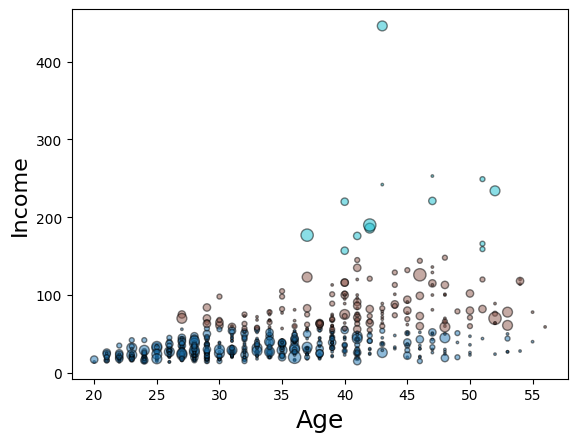

In [ ]:
area = np.pi * ( X[:, 1])**2
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), cmap='tab10', ec='k',alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

In [ ]:
fig = px.scatter_3d(X, x=1, y=0, z=3, opacity=0.7, color=labels.astype(float))

fig.update_traces(marker=dict(size=5, line=dict(width=.25)), showlegend=False)
fig.update_layout(coloraxis_showscale=False, width=1000, height=800, scene=dict(
        xaxis=dict(title='Education'),
        yaxis=dict(title='Age'),
        zaxis=dict(title='Income')
    ))
fig.show()


In [ ]:
cluster_summary = (
    cust_df.groupby("Clus_km")
           .agg(Count=("Clus_km","size"),
                Age_mean=("Age","mean"),
                Income_mean=("Income","mean"))
           .reset_index()
)
z = cluster_summary[["Income_mean","Age_mean"]].apply(
    lambda s: (s - s.mean())/s.std(ddof=0)
)

score = 0.6*z["Income_mean"] + 0.4*z["Age_mean"]
ranked = cluster_summary.assign(Score=score).sort_values("Score", ascending=False).reset_index(drop=True)
name_map = {}
name_map[ranked.loc[0,"Clus_km"]] = "LATE CAREER, AFFLUENT"
name_map[ranked.loc[1,"Clus_km"]] = "MID CAREER AND MIDDLE INCOME"
name_map[ranked.loc[2,"Clus_km"]] = "EARLY CAREER AND LOW INCOME"
profiles = cluster_summary.assign(Profile=cluster_summary["Clus_km"].map(name_map))[
    ["Profile","Clus_km","Count","Age_mean","Income_mean"]
].sort_values("Profile")

profiles


,Profile,Clus_km,Count,Age_mean,Income_mean
0,EARLY CAREER AND LOW INCOME,0,531,32.775895,30.642185
2,"LATE CAREER, AFFLUENT",2,14,44.785714,219.714286
1,MID CAREER AND MIDDLE INCOME,1,155,41.103226,81.122581


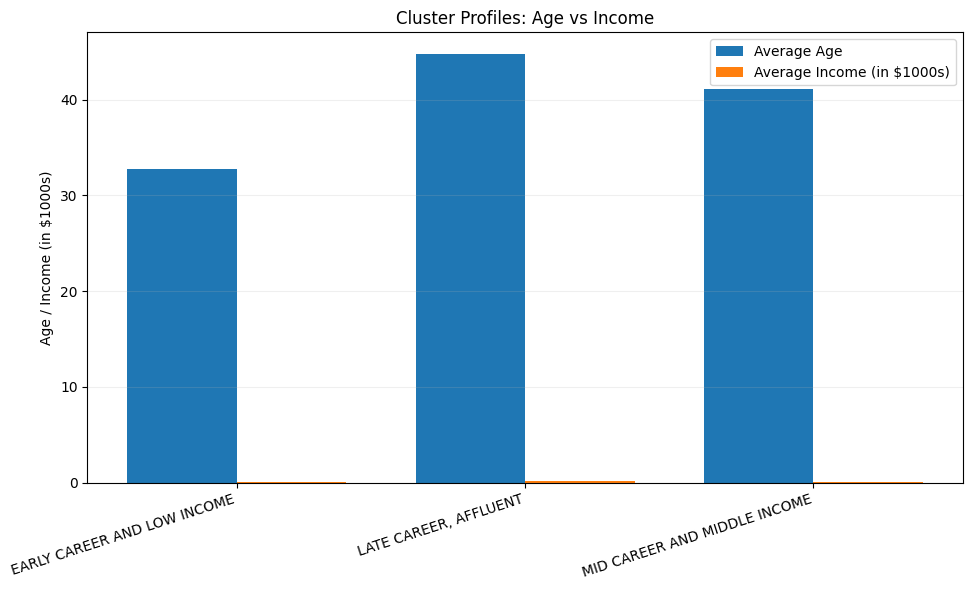

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cluster_summary = (
    cust_df.groupby("Clus_km")
           .agg(Count=("Clus_km","size"),
                Age_mean=("Age","mean"),
                Income_mean=("Income","mean"))
           .reset_index()
)

z = cluster_summary[["Income_mean","Age_mean"]].apply(lambda s: (s - s.mean())/s.std(ddof=0))
score = 0.6*z["Income_mean"] + 0.4*z["Age_mean"]
ranked = cluster_summary.assign(Score=score).sort_values("Score", ascending=False).reset_index(drop=True)

name_map = {
    ranked.loc[0, "Clus_km"]: "LATE CAREER, AFFLUENT",
    ranked.loc[1, "Clus_km"]: "MID CAREER AND MIDDLE INCOME",
    ranked.loc[2, "Clus_km"]: "EARLY CAREER AND LOW INCOME",
}

profiles = (cluster_summary
            .assign(Profile=cluster_summary["Clus_km"].map(name_map))
            [["Profile","Clus_km","Count","Age_mean","Income_mean"]]
            .sort_values("Profile"))

labels = profiles["Profile"].tolist()
age_vals = profiles["Age_mean"].values
income_vals = profiles["Income_mean"].values / 1000.0
x = np.arange(len(labels))
w = 0.38

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x - w/2, age_vals, width=w, label="Average Age")
ax.bar(x + w/2, income_vals, width=w, label="Average Income (in $1000s)")

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=18, ha="right")
ax.set_ylabel("Age / Income (in $1000s)")
ax.set_title("Cluster Profiles: Age vs Income")
ax.legend()
ax.grid(axis="y", alpha=0.2)

plt.tight_layout()
plt.show()
